### ROC for the face verification

#### Load data from sheet

In [5]:
import pandas as pd
import numpy as np

distance_frame = pd.read_csv("data.csv", header=None)
distance_frame

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.298288,0.934099,1.002120,1.035634,0.977002,0.992371,0.878079,0.993719,1.027326,1.059493,...,0.905088,0.987808,0.952029,1.013771,0.947566,0.982297,0.893985,0.993316,0.895281,0.962314
1,1.050939,0.209427,0.868502,0.982969,0.977224,0.937439,0.751640,1.010728,0.850576,0.902525,...,0.985803,0.613970,0.990804,1.024738,0.958447,0.859347,1.001994,0.842645,1.052402,0.900438
2,1.012333,0.891389,0.274860,1.042113,0.942932,0.885898,0.965128,1.016891,0.902685,0.958096,...,1.027876,0.837138,0.892050,0.993693,1.027751,0.865287,1.089340,1.073992,1.025951,1.023295
3,0.968922,0.984726,0.898474,0.234743,0.853074,0.941228,0.937038,0.897213,0.831465,0.836521,...,1.032573,0.992657,0.866771,0.914118,0.984730,0.986700,0.980917,0.938951,0.871504,1.009721
4,0.892959,0.973741,0.934005,0.857606,0.418700,0.887388,1.005626,0.983790,0.897759,0.897300,...,0.939173,0.858548,0.952169,1.016015,0.948455,1.060895,0.938445,0.830398,0.972102,0.945679
5,0.932462,0.938751,0.891683,0.921353,0.858188,0.309216,0.997518,0.867208,0.945412,0.887233,...,0.965831,0.922734,0.963372,0.952170,0.815003,0.821232,0.908376,0.896182,1.090256,0.875796
6,0.968067,0.857885,0.942084,0.989262,1.009704,0.916626,0.246518,0.947624,0.956205,0.949779,...,0.840508,0.781462,0.961758,0.911191,0.924289,0.949466,0.950977,0.968167,0.977086,0.955763
7,0.941053,0.958560,0.972087,0.848045,0.928891,0.858180,0.970759,0.278453,0.862230,0.813124,...,1.005471,0.981832,0.801575,0.871528,1.028999,0.988608,0.917342,0.878703,0.891584,0.883763
8,0.982165,0.842517,0.812609,0.838747,0.895731,0.913499,0.899898,0.995772,0.263141,0.903362,...,0.983560,0.819171,0.916294,1.046791,0.919351,0.976137,0.990906,0.897563,0.815676,0.906015
9,0.923316,0.908934,0.897892,0.889086,0.870431,0.959563,0.884462,0.866385,0.938171,0.372493,...,0.988115,0.862546,0.796993,0.899824,0.993288,0.966226,0.966500,0.861126,0.967702,0.857564


#### Calculate the TF Positive  and TF Negative

In [3]:
def cal_true_positive(matrix, threshold):
    """ Predict: True
        Actual: True
    """
    return np.sum(matrix.diagonal() <= threshold)
    
def cal_true_negative(matrix, threshold):
    """ Predict: False
        Actual: False
    """
    # Predict diff person
    # Fill diagonal with 1 value
    matrix_copy = matrix.copy()
    np.fill_diagonal(matrix_copy, 1)
    return int(np.sum(matrix_copy > threshold) - np.sum(matrix_copy.diagonal()))

def cal_false_negative(matrix, threshold):
    """ Predict: False
        Actual: True
    """
    return np.sum(matrix.diagonal() > threshold)

def cal_false_positive(matrix, threshold):
    """ Predict: True
        Actual: False
    """
    matrix_copy = matrix.copy()
    np.fill_diagonal(matrix_copy, 1)
    return np.sum(matrix_copy <= threshold)

def cal_true_positive_rate(TP, FN):
    return round(TP/(TP+FN),2)

def cal_false_positive_rate(FP,TN):
    return round(FP/(FP+TN),2)

def cal_precision(TP,FP):
    return round(TP/(TP+FP),2)

def cal_recall(TP,FN):
    return round(TP/(TP+FN),2)

def cal_accuracy(TP,TN,FP,FN):
    return round((TP+TN)/(TP+TN+FP+FN),2)



In [6]:
def test(matrix):
    thresholds = [0.39, 0.45]
    for thresh in thresholds:
        print("thresholds = ", thresh)
        FP = cal_false_positive(matrix.to_numpy(), thresh)
        TN = cal_true_negative(matrix.to_numpy(), thresh)
        TP = cal_true_positive(matrix.to_numpy(), thresh)
        FN = cal_false_negative(matrix.to_numpy(), thresh)
        TPR = cal_true_positive_rate(TP, FN)
        FPR = cal_false_positive_rate(FP, TN)
        precision = cal_precision(TP, FP)
        recall = cal_recall(TP, FP)
        accuracy = cal_accuracy(TP, TN, FP, FN)
        print("FP: ", FP)
        print("TN: ", TN)
        print("TP: ", TP)
        print("FN: ", FN)
        print("TPR: ", TPR)
        print("FPR: ", FPR)
        print("precision: ", precision)
        print("recall: ", recall)
        print("accuracy: ", accuracy)
        print("="*30)

test(distance_frame)

thresholds =  0.39
FP:  0
TN:  600
TP:  21
FN:  4
TPR:  0.84
FPR:  0.0
precision:  1.0
recall:  1.0
accuracy:  0.99
thresholds =  0.45
FP:  0
TN:  600
TP:  23
FN:  2
TPR:  0.92
FPR:  0.0
precision:  1.0
recall:  1.0
accuracy:  1.0


#### Visualization ROC with some threshold
- True positive rate (TP/(TP + FN))
- False positive rate (FP/(FP + TN))

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import auc

def visualize(matrix):
    fpr = []
    tpr = []
    precision = []
    recall = []
    acc = []
    thresholds = np.arange(0, 1, 0.01)
    for thresh in thresholds:
        FP = cal_false_positive(matrix.to_numpy(), thresh)
        TN = cal_true_negative(matrix.to_numpy(), thresh)
        TP = cal_true_positive(matrix.to_numpy(), thresh)
        FN = cal_false_negative(matrix.to_numpy(), thresh)
        fpr.append(round(FP/(FP+TN),2))
        tpr.append(round(TP/(TP+FN),2)) # True positive rate
        recall.append(round(TP/(TP+FN),2))   # True positive rate
        precision.append(round(TP/(TP+FP),2))
        acc.append(round((TP+TN)/(TP+TN+FP+FN),2))

    fig, ax = plt.subplots(2)
    fig.set_figheight(30)
    fig.set_figwidth(30)
    ax[0].plot(fpr, tpr, marker='.', markersize=20, color='green', label=f"AUC = {auc(fpr, tpr)})") 
    ax[0].axline((0, 0), (1,1), marker='.', markersize=20, color='blue', linestyle="--") 
    ax[0].set_title('ROC curve for face verification', fontsize=35)
    ax[0].set_xlabel('False Positive Rate', fontsize=20)
    ax[0].set_ylabel('True Positive Rate', fontsize=20)
    ax[0].fill_between(fpr, tpr, -1, facecolor='lightblue', alpha=0.5)
    ax[0].legend(loc="lower right", fontsize=20)
    ax[0].set_xlim([-0.05, 1.05])
    ax[0].set_ylim([-0.05, 1.05])
    
    # ax[1].plot(recall, precision, marker='.', markersize=20, color='green', label=f"AUC = {auc(precision[8:], recall[8:])})")
    ax[1].plot(recall, precision, marker='.', markersize=20, color='green', label=f"AUC = {auc(recall, precision)})")
    ax[1].set_title('Precision-Recall curve for face verification', fontsize=35)
    ax[1].set_xlabel('Recall (TPR)', fontsize=20)
    ax[1].set_ylabel('Precision', fontsize=20)
    ax[1].fill_between(recall, precision, -1, facecolor='lightblue', alpha=0.5)
    ax[1].legend(loc="lower left", fontsize=20)
    ax[1].set_xlim([-0.05, 1.05])
    ax[1].set_ylim([-0.05, 1.05])
    
    for i, txt in enumerate(thresholds):
        if txt >= 0.1 and txt <=0.33:
            ax[0].annotate(round(txt,2), (fpr[i], tpr[i]), 
                    xytext=(fpr[i]+0.01, tpr[i]-0.1), 
                    bbox=dict(boxstyle="round", alpha=0.1), 
                    arrowprops = dict(arrowstyle="simple"),
                    fontsize=15)
            
    for j, txt in enumerate(thresholds[8:]):
        if txt >= 0.1 and txt <=0.29:
            ax[1].annotate(round(txt,2), (recall[j], precision[j]), 
                    xytext=(recall[j]-0.01, precision[j]-0.1), 
                    bbox=dict(boxstyle="round", alpha=0.1), 
                    arrowprops = dict(arrowstyle="simple"),
                    fontsize=15)

    fig.savefig("total_distance_facer.jpg")

/tmp/ipykernel_29984/4129643467.py:19: RuntimeWarning: invalid value encountered in scalar divide
  precision.append(round(TP/(TP+FP),2))


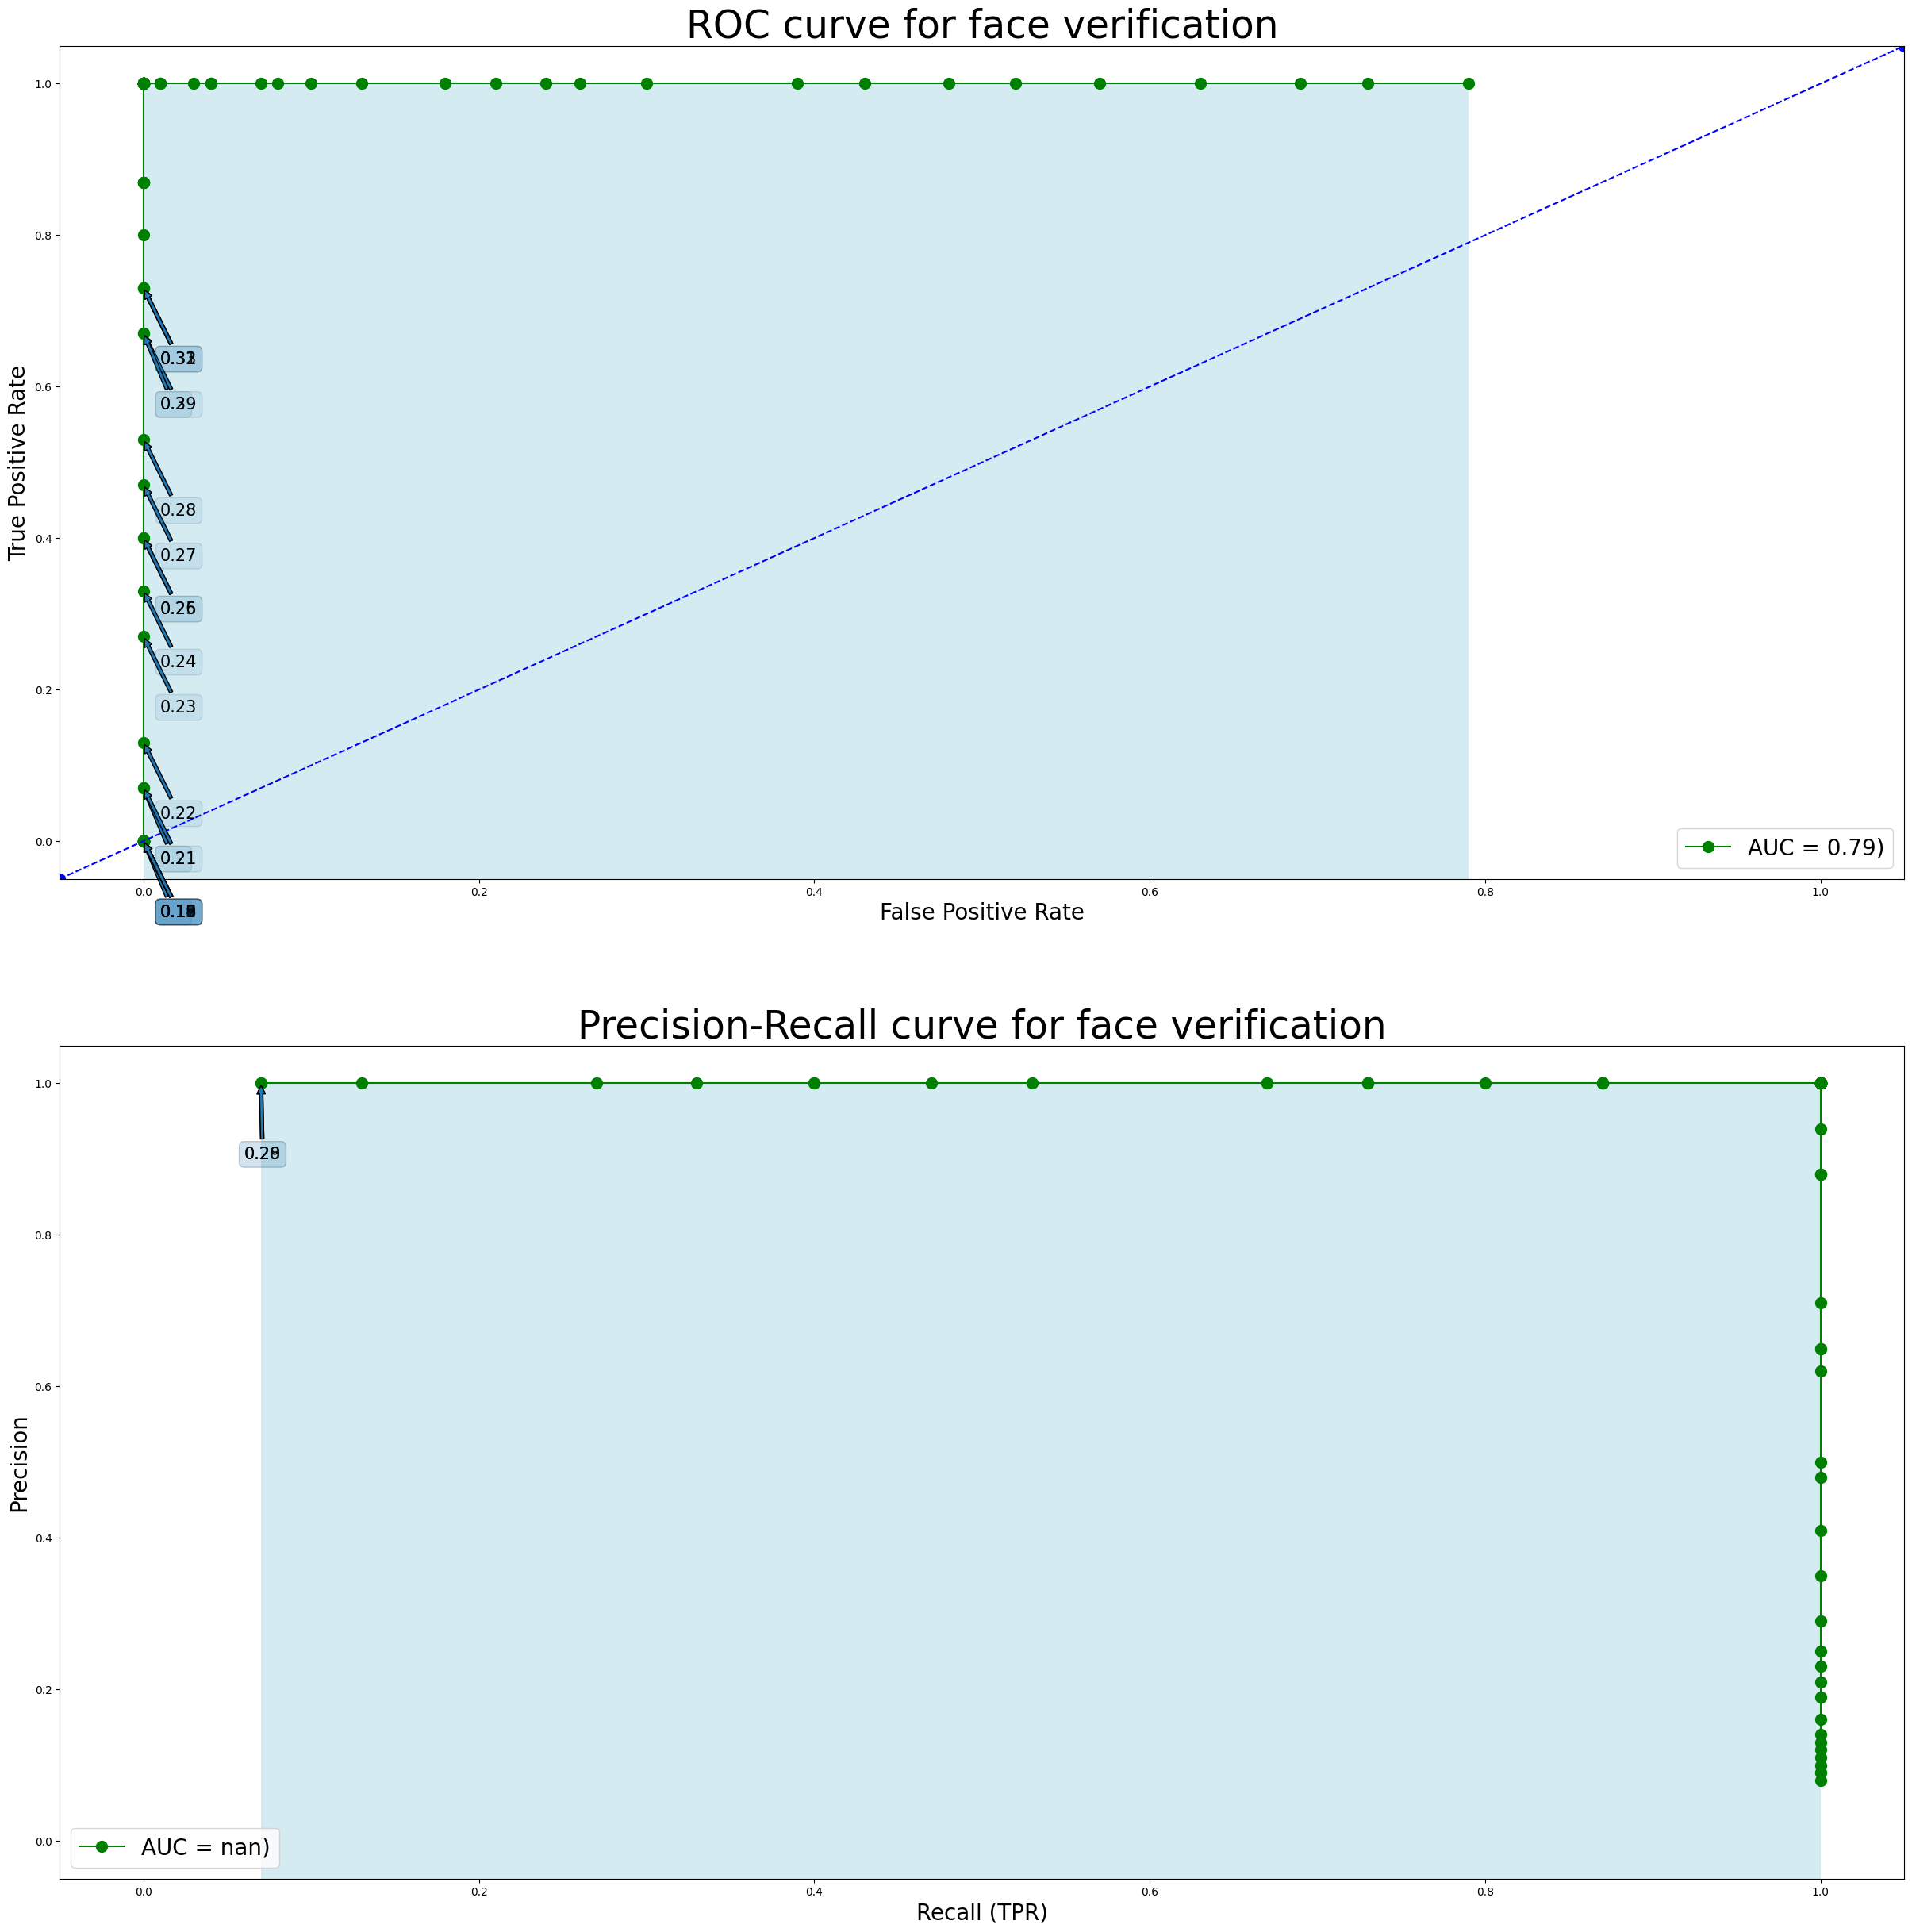

In [5]:
visualize(distance_frame)